## Image Processing fundamentals

* images are composed on pixels
* most of the tools process images in 8 bit size, the value of pixel can range from 0 to 255
* in case of grayscale images one pixel will be represented by 1 value,
* in case of color images, one pixel will be represented by 3 values - 3 channel images ( red, green, blue)
* imagess are primarily matrices of pixels

In [1]:
import numpy as np
import matplotlib.pyplot as plt

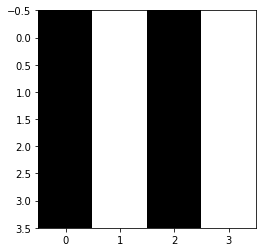

In [2]:
x = np.array([[0,255,0,255],
              [0,255,0,255],
              [0,255,0,255],
              [0,255,0,255]])
plt.imshow(x,cmap='gray')
plt.show()

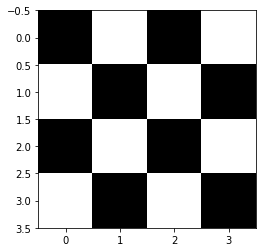

In [3]:
x = np.array([[0,255,0,255],
              [255,0,255,0],
              [0,255,0,255],
              [255,0,255,0]])
plt.imshow(x,cmap='gray')
plt.show()

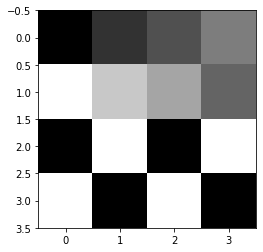

In [4]:
x = np.array([[0,50,80,125],
              [255,200,165,100],
              [0,255,0,255],
              [255,0,255,0]])
plt.imshow(x,cmap='gray')
plt.show()

### Color Images
* each pixel will have 3 values - each ranging from 0 to 255 = R,G,B
* [0,255,0] = Green
* [0,0,255] = Blue
* [255,0,0] = Red

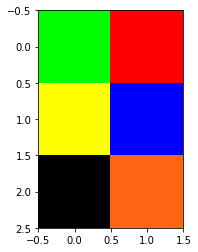

In [5]:
y = np.array([[ [0,255,0], [255,0,0] ],
              [ [255,255,0], [0,0,255] ],
              [ [0,0,0], [255,100,20] ]])
plt.imshow(y)
plt.show()

In [6]:
y.shape

(3, 2, 3)

In [7]:
x.shape

(4, 4)

In [8]:
!wget -q https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/image_data.zip

In [9]:
!unzip image_data.zip

Archive:  image_data.zip
  inflating: image_data/car3.png     
  inflating: image_data/cat.jpeg     
  inflating: image_data/cat2.jpg     
   creating: image_data/data/
   creating: image_data/data/dogs/
  inflating: image_data/data/dogs/dog.1.jpg  
  inflating: image_data/data/dogs/dog.10.jpg  
  inflating: image_data/data/dogs/dog.100.jpg  
  inflating: image_data/data/dogs/dog.101.jpg  
  inflating: image_data/data/dogs/dog.102.jpg  
  inflating: image_data/data/dogs/dog.103.jpg  
  inflating: image_data/data/dogs/dog.104.jpg  
  inflating: image_data/data/dogs/dog.105.jpg  
  inflating: image_data/data/dogs/dog.106.jpg  
  inflating: image_data/data/dogs/dog.107.jpg  
  inflating: image_data/data/dogs/dog.108.jpg  
  inflating: image_data/data/dogs/dog.109.jpg  
  inflating: image_data/data/dogs/dog.11.jpg  
  inflating: image_data/data/dogs/dog.110.jpg  
  inflating: image_data/data/dogs/dog.111.jpg  
  inflating: image_data/data/dogs/dog.112.jpg  
  inflating: image_data/data/dog

In [10]:
img = plt.imread("/content/image_data/cat.jpeg")
img.shape

(350, 525, 3)

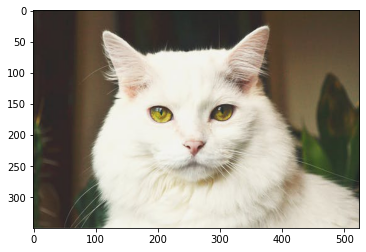

In [11]:
plt.imshow(img)
plt.show()

# Image Classification

In [12]:
import pandas  as pd
import numpy as np
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


## Data Preparation

In [13]:
main_folder = "/content/image_data/data/"
classnames = os.listdir(main_folder)
classnames

['Humans', 'dogs', 'horses']

In [14]:
x = []
y = []
for folder in classnames:
  filelist = os.listdir(main_folder+folder)
  for imgname in filelist:
    img = image.load_img(main_folder+folder+"/"+imgname,target_size=(50,50))
    img = image.img_to_array(img)
    x.append(img)
    y.append(classnames.index(folder))

In [15]:
x = np.array(x)
y = np.array(y)
# onehot encode the labels
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
print(x.shape,y.shape)

(606, 50, 50, 3) (606, 3)


In [16]:
image.load_img?

In [ ]:
plt.imshow(x[0].astype('int32'))
plt.show()

In [18]:
# scaling the image to bring pixel values b/w 0 to 1
x = x/255

## Modelling the Neural Network

* number of classses = 3
* numer of neurons on output layer = 3
* activation function on output layer = softmax
* loss = categorical_crossentropy
* In order to feed the images to the dense layer we will need to convert each image to a 1D array, we will use a flatten layer in the network

In [19]:
from tensorflow.keras import models,layers

In [20]:
ip_layer = layers.Input(shape=(50,50,3))

# flatten layer convert an array to a 1D array, 5x5 will be converted to 1x25
ft = layers.Flatten()(ip_layer)
# first hidden layer
h1 = layers.Dense(units=500,activation='relu')(ft)

# mroe hidden layers
h2 = layers.Dense(units=300,activation='relu')(h1)
h3 = layers.Dense(units=200,activation='relu')(h2)
h4 = layers.Dense(units=100,activation='relu')(h3)
h5 = layers.Dense(units=50,activation='relu')(h4)

#output layer
op = layers.Dense(3,activation='softmax')(h5)

model = models.Model(inputs=ip_layer,outputs=op)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 7500)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               3750500   
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050  

In [21]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2,random_state=5)

In [22]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
model.fit(xtr,ytr,batch_size=32,epochs=20,validation_data=(xts,yts))

Epoch 1/20
16/16 [==============================] - 3s 21ms/step - loss: 1.5763 - accuracy: 0.3492 - val_loss: 1.2820 - val_accuracy: 0.3525
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 1.2570 - accuracy: 0.4008 - val_loss: 1.0317 - val_accuracy: 0.4344
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 1.0961 - accuracy: 0.4298 - val_loss: 1.0990 - val_accuracy: 0.4426
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 1.1191 - accuracy: 0.4483 - val_loss: 1.1266 - val_accuracy: 0.5574
Epoch 5/20
16/16 [==============================] - 0s 9ms/step - loss: 1.0094 - accuracy: 0.5248 - val_loss: 0.9559 - val_accuracy: 0.5574
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 0.9309 - accuracy: 0.5579 - val_loss: 0.9251 - val_accuracy: 0.5656
Epoch 7/20
16/16 [==============================] - 0s 8ms/step - loss: 0.8665 - accuracy: 0.6054 - val_loss: 0.8639 - val_accuracy: 0.6230
Epoch 8/20
16/16 [=

In [36]:
!wget -q https://idsb.tmgrup.com.tr/2018/05/22/horses-the-wings-of-mankind-1527015927739.jpg

In [32]:
!wget -q https://cdn.britannica.com/96/1296-050-4A65097D/gelding-bay-coat.jpg

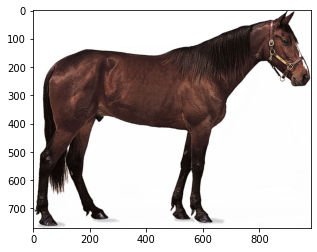

In [33]:
img = plt.imread("gelding-bay-coat.jpg")
plt.imshow(img)
plt.show()

In [34]:
img = image.img_to_array(image.load_img("gelding-bay-coat.jpg",target_size=(50,50)))
img = img/255
print(img.shape)
pred = model.predict(img.reshape(1,50,50,3))
print(pred)

(50, 50, 3)
[[0.04581173 0.9443305  0.00985781]]


In [35]:
max_porb = np.argmax(pred)
print(max_porb,classnames[max_porb])

1 dogs
